<a href="https://colab.research.google.com/github/Rajakumaran-S/Credit_Card_Default_Prediction_Capstone-Project_III/blob/main/Raja_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

-------

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -** Rajakumaran S


## **Project Summary Link**

## **GitHub Link** 
https://github.com/Rajakumaran-S/Credit_Card_Default_Prediction_Capstone-Project_III

## <b>  Problem Statement </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b>  Data Description </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## 1. Understanding of the data

### 1.1 Import Libraries

In [11]:
#Importing all required Librarys:
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### 1.2 Dataset Loading

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#Reading Dataset:
df = pd.read_excel('/content/drive/MyDrive/Alma Better/default of credit card clients.xls', header = 1) 
#header: we are using 2nd row as our header

### 1.3 Dataset First View

In [14]:
#Checking Sample data in thr dataset:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### 1.4 Dataset Rows & Columns count
 
* There are 30,000 rows and 25 columns in the dataset

### 1.5 Dataset Information

In [15]:
#Checking info of the Dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## ***2. Understanding Your Variables***

In [16]:
#All columns in the dataset:
columns=df.columns
columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### 2.1 Variables Description 

* ID: ID of each customer
* LIMIT_BAL: Amount of the given credit (NT dollar)
* SEX: Gender(Male = 1, Female: 2)
* EDUCATION: (1= graduate school, 2=University, 3=High School, 0,4,5,6 = Others)
* MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)
* AGE: Age in years

**Scale for PAY_0 to PAY_6** : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)
* PAY_0: Repayment status in September, 2005 (same scale as given)
* PAY_2: Repayment status in August, 2005 (same scale as given)
* PAY_3: Repayment status in July, 2005 (same scale as given)
* PAY_4: Repayment status in June, 2005 (same scale as given)
* PAY_5: Repayment status in May, 2005 (same scale as given)
* PAY_6: Repayment status in April, 2005 (same scale as given)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default payment next month: Default Payments(1 = Yes, 0 = No)

We have been provided with 6 months credit card transaction history along with the informative details of customer and their current status, on the basis of this dataset we have to predict either he/she is a defaulter or not if he/she possess with these qualities.

In [17]:
# Rename the names of features according to the description, 
# it will make our task easy in Exploratoy data analysis and in further appoaches.
df.rename(columns={'PAY_0':'REPAY_SEPT','PAY_2':'REPAY_AUG','PAY_3':'REPAY_JULY','PAY_4':'REPAY_JUNE','PAY_5':'REPAY_MAY','PAY_6':'REPAY_APRIL',
                    'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JULY','BILL_AMT4':'BILL_AMT_JUNE','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APRIL',
                    'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JULY','PAY_AMT4':'PAY_AMT_JUNE','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APRIL',
                    'default payment next month': 'Default_Payments'},inplace = True)

In [18]:
#Describe the dataset:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JULY,REPAY_JUNE,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Default_Payments
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [19]:
columns=df.columns
columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'REPAY_SEPT',
       'REPAY_AUG', 'REPAY_JULY', 'REPAY_JUNE', 'REPAY_MAY', 'REPAY_APRIL',
       'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUNE',
       'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL',
       'Default_Payments'],
      dtype='object')

### 2.2 Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
for col in columns:
    print(col)
    print('No of Unique values: ',df[col].nunique())
    print(df[col].unique())
    print('-'*80)

ID
No of Unique values:  30000
[    1     2     3 ... 29998 29999 30000]
--------------------------------------------------------------------------------
LIMIT_BAL
No of Unique values:  81
[  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
--------------------------------------------------------------------------------
SEX
No of Unique values:  2
[2 1]
--------------------------------------

### Observation:
    * There are 30000 rows and 25 columns(Features) in the dataset
    * our target variable is default payment next month

## 3. ***Data Wrangling***

### 3.1 Checking Duplicated data

In [21]:
#Checking duplicates in the dataset:
print(len(df[df.duplicated()]))

0


### 3.2 Checking Null Values
* From the df.info, we can see there is no null values in the dataset

### 3.3 Drop Unwanted Columns

In [22]:
#Drop ID Column
df.drop(columns='ID',inplace=True)

### 3.4 Identifying Outliers in the dataset

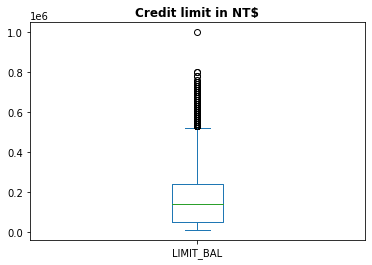

In [23]:
# Using boxplot to identify any outlier in credit limit

df["LIMIT_BAL"].plot(kind="box")
plt.title('Credit limit in NT$', fontweight='bold')
plt.show()

In [24]:
# Taking a close look at the outlier with a value of 1 MILLION NT DOLLARS
# The observations from other columns indicate that this was just ONE CUSTOMER who has an excellent payment history
# Therefore it should be considered as a valid data

outliers = df.loc[df['LIMIT_BAL']>900000]
outliers

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JULY,REPAY_JUNE,REPAY_MAY,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Default_Payments
2197,1000000,2,1,1,47,0,0,0,-1,0,...,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


### 3.5 Making Meaningful Columns data

####  Education Column

In [25]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [26]:
# In data given values are  1 = graduate school; 2 = university; 3 = high school; 4 = others so all other are not given in data we include them on others
df['EDUCATION']=df['EDUCATION'].apply(lambda x :4 if x in [0,4,5,6]  else x)      

In [27]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

#### Marriage Column

In [28]:
# Value count of Marital_status Column, 
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [29]:
# in data 1= Married; 2=single; we making 3 and 0 as 'Others=0'
df['MARRIAGE']=df['MARRIAGE'].apply(lambda x :3 if x in [0,3]  else x)  

In [30]:
# Value count of Marital_status Column, 
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

#### Repayment Status Column

In [31]:
# Defining function for all Repayments status value less than 0 consider as 0
def repayment(delay):
    if delay <= 0:
      return 0
    else:
      return delay

In [32]:
# Apply function on Repayments status columns
for i in df[['REPAY_SEPT','REPAY_AUG', 'REPAY_JULY', 'REPAY_JUNE', 'REPAY_MAY', 'REPAY_APRIL']].columns:
    df[i]=df[i].apply(repayment)

### Observation:
   
    * there is no null values and duplicates values in the dataset.
    * we droped 'ID' Column because ID column will not affect target variable.
      Dropped the unnmaned column
    * With help of box plot we found outlier Bal_limit of 100000 of one customer. the data is valid customer data. so we are not removed data from the dataset
    * In data given values are 1 = graduate school; 2 = university; 3 = high school; 4 = others so all other are not given in data we include them on others.
    * In marital status the given values are 1 = married; 2 = single; 3 = others and 0 is not given in data, we include them on  others as 0
    * In the repayment column, we have not given information about 0 and -2 values so we placed less then zero value to 0.
   

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### 4.1 Target Variable

In [33]:
df['Default_Payments'].value_counts().sort_index()

0    23364
1     6636
Name: Default_Payments, dtype: int64

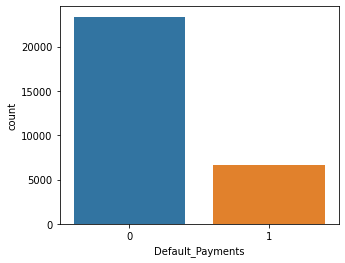

In [34]:
#check target variable value proportion Using Univaraiate analysis
plt.figure(figsize=(5,4))
sns.countplot(x = 'Default_Payments', data = df)

In [35]:
#Checking percentage of defaulter
df['Default_Payments'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: Default_Payments, dtype: float64

### Observation:
* we have a imbalanced of a target variable in the dataset
* 22% of customers has default payment next month 

### 4.2 Independent Variable:

In [36]:
#Continious columns in the dataset
con_columns=df.columns[11:23]
con_columns

Index(['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUNE',
       'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL'],
      dtype='object')

In [37]:
#Categorical columns
cat_columns=df.columns[0:11]
cat_columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'REPAY_SEPT',
       'REPAY_AUG', 'REPAY_JULY', 'REPAY_JUNE', 'REPAY_MAY', 'REPAY_APRIL'],
      dtype='object')

### 4.2.1  Is the proportion of defaults the same for men and women?

In [38]:
# Sex vs deafault payment
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [39]:
default_sex_crosstab = pd.crosstab(df['Default_Payments'],df['SEX'],margins=True,normalize=False)

# default payment next month:
# 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default', }

# SEX: 
# 1 = male; 2 = female
new_columns = {1 : 'Male', 2 : 'Female'}

default_sex_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
default_sex_crosstab

SEX,Male,Female,All
Default_Payments,,,
Non-default,9015,14349,23364
Default,2873,3763,6636
All,11888,18112,30000


In [40]:
default_sex_crosstab_norm =  default_sex_crosstab / default_sex_crosstab.loc['All']
default_sex_crosstab_norm

SEX,Male,Female,All
Default_Payments,,,
Non-default,0.758328,0.792237,0.7788
Default,0.241672,0.207763,0.2212
All,1.000000,1.000000,1.0000


### Observation:
* As per data, we have 11888 customers of male and 18112 customers of female
* male customers are the most no of default compared to the female customers.

### 4.2.2 Did customers with a high education level get higher credit limits?


In [41]:
# Education
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

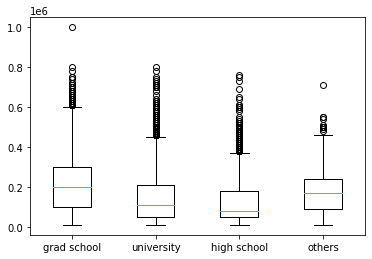

In [42]:
# Use boxplot to visualize credit limit grouped by education level

data = []
for i in [1,2,3,4]:
    temp = df.loc[df.EDUCATION == i, "LIMIT_BAL"]
    data.append(temp)

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(["grad school", "university", "high school","others"])

plt.show()

### Observation:
* From the boxplot, we can see that customers with grad school education have the highest 25% percentile,highest median,highest 75th percentile and highest maximum numbers, which proves that customers with higher education levels did get higher credit limits.

Marriage Column:

In [43]:
# Marriage
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

There is another thing that need to be done here, we have to change the classification denotion from 0,1,2,3 to a reasonable class that they actually tells us in the data description for e.g.,

Sex: (1 = Male,0 = Female)

So, we have to this with all the three categorical features.

### 4.2.3 Replace numerical value to categorical original valid name to do EDA:

In [44]:
#making copy of data to do EDA
df_cat=df.copy()
df_cat

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JULY,REPAY_JUNE,REPAY_MAY,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Default_Payments
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,0,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,0,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,0,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [45]:
# Now replace the classification denotion 
df_cat['SEX_cat']=df['SEX'].replace({1 : 'Male',2 : 'Female'})
df_cat['EDUCATION_cat']=df['EDUCATION'].replace({1 : 'Graduates',2 : 'University',3 : 'High School',4 : 'Others'})
df_cat['MARRIAGE_cat']=df['MARRIAGE'].replace({1 : 'Married',2 : 'Single',3 : 'Others'})
df_cat['Default_Payments_cat']=df['Default_Payments'].replace({0:'default',1:'Not default'})
df_cat=df_cat.iloc[:,24:]
df_cat

,SEX_cat,EDUCATION_cat,MARRIAGE_cat,Default_Payments_cat
0,Female,University,Married,Not default
1,Female,University,Single,Not default
2,Female,University,Single,default
3,Female,University,Married,default
4,Male,University,Married,default
...,...,...,...,...
29995,Male,High School,Married,default
29996,Male,High School,Single,default
29997,Male,University,Single,Not default
29998,Male,High School,Married,Not default


#### **Plotting all these Categorical features with Dependent variable** 


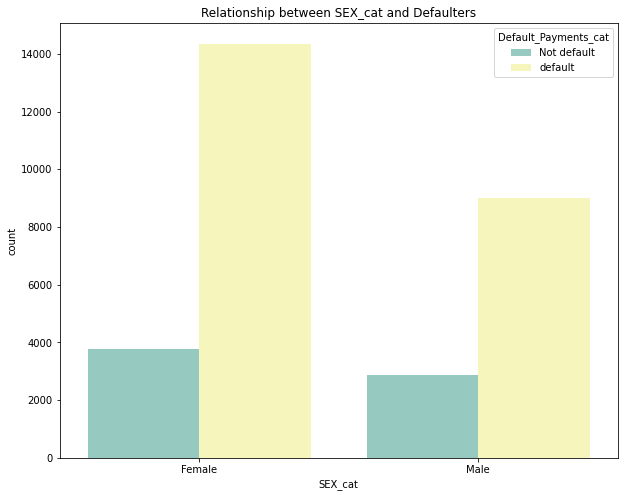

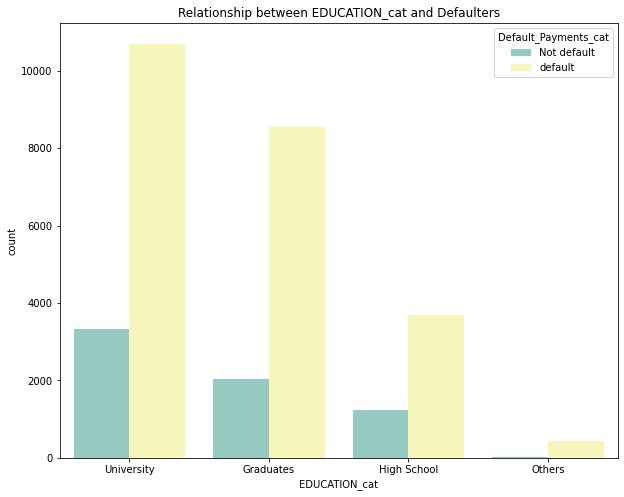

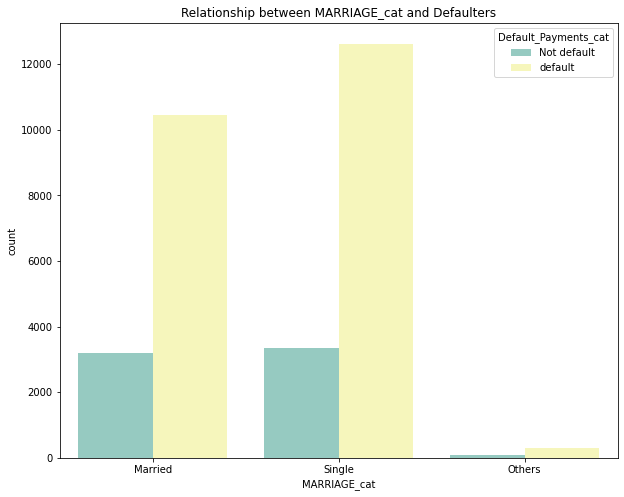

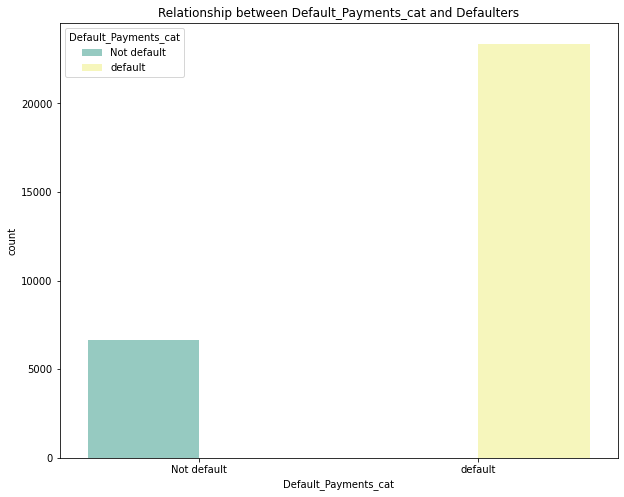

In [46]:
# categorical features with dependent variable 
for col in df_cat.columns:
  fig, ax = plt.subplots(figsize = (10,8))
  sns.countplot(x = col, hue = 'Default_Payments_cat', data = df_cat,palette = "Set3")
  ax.set(title = 'Relationship between ' +col+ ' and Defaulters')

### Observation:

* Females have the majority holding of cred cards in comparison to males but ratio of defaulters is high in Males.
* University and Graduates are holding high proportions of Credit cards.
* Singles and Married have proportion of credit cards according to the countplot singles have more numbers in defaulters.

### **4.2.4 Repayment Histrory According to Months with Default Payments**
---

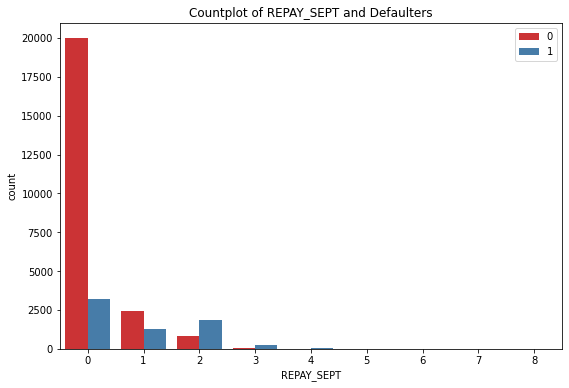

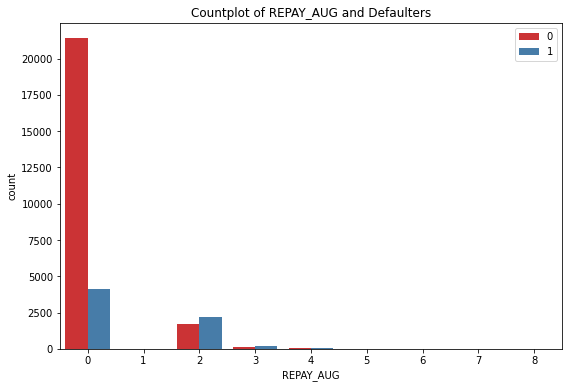

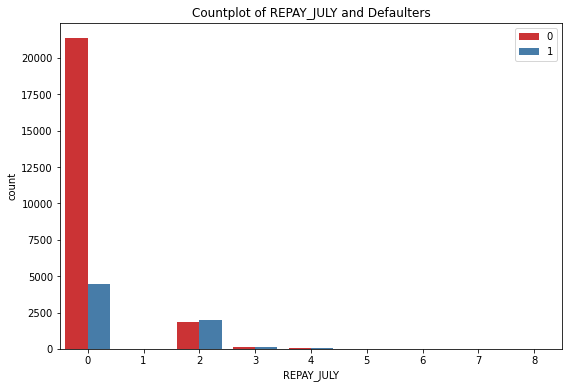

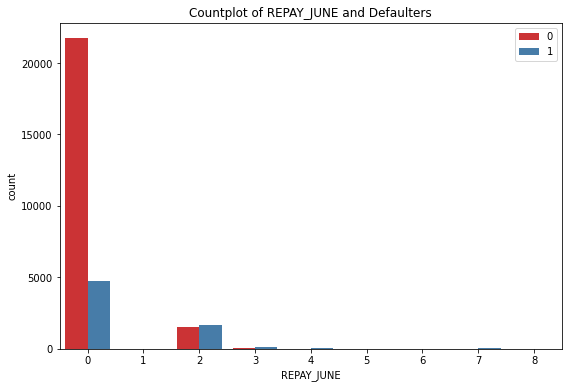

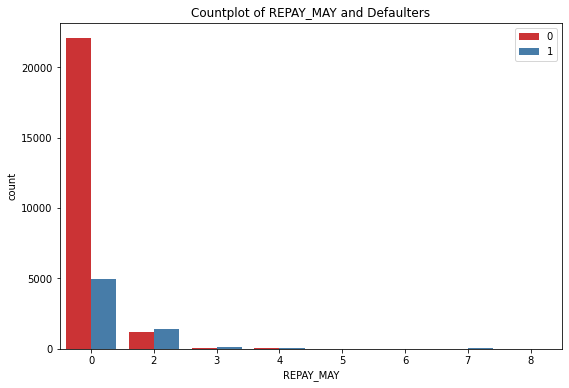

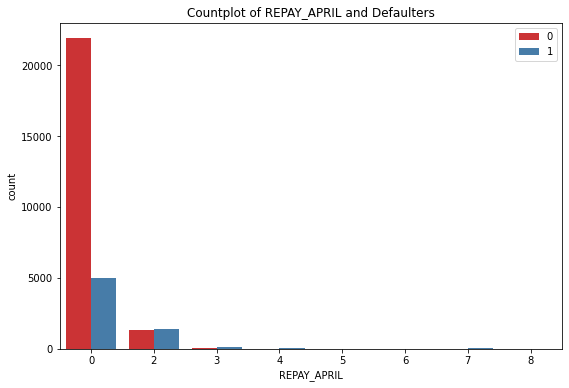

In [47]:
# Amount paid in different months 
pay_scale = ['REPAY_SEPT','REPAY_AUG','REPAY_JULY','REPAY_JUNE','REPAY_MAY','REPAY_APRIL']
for col in pay_scale:
  fig, ax = plt.subplots(figsize = (9,6))
  sns.countplot(x = col, hue = 'Default_Payments',data = df,palette = 'Set1')
  ax.legend(loc = 'upper right')
  ax.set(title = 'Countplot of '+col+' and Defaulters')
  

### Describing the Xlabel of Repay scale

-2 = No consumption

-1 = paid in full

0 = use of revolving credit (paid minimum only)

1 = payment delay for one month

2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

---
### Conclusion:
* From the repayment of 6 month data, most of the default and not default customer have paid minimum only .


### **4.2.5 Continous Independent Features with Dependent Variable**
---

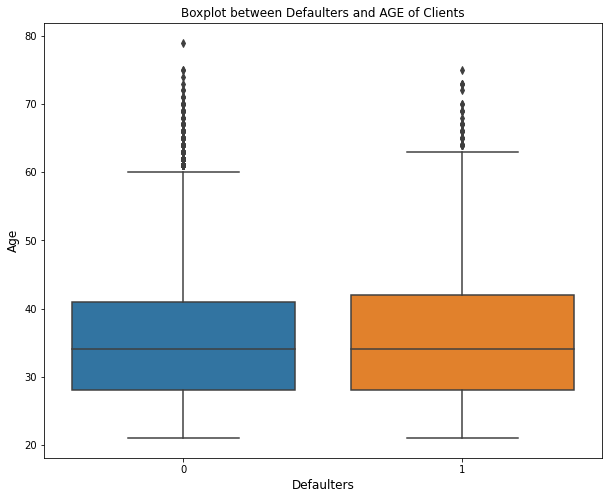

In [48]:
# Boxplot AGE vs Defaulters
plt.figure(figsize = (10,8))
sns.boxplot(x = 'Default_Payments',y = 'AGE',data = df)
plt.title('Boxplot between Defaulters and AGE of Clients')
plt.xlabel('Defaulters',fontsize = 12)
plt.ylabel('Age',fontsize = 12)
plt.show()

* Median shows that our poplutaion of defaulters and not defaulters are around 35 years
* Two many outliers are above the ages of 60 years in both classification. It means old-age people may be defaulters.

Text(0, 0.5, 'Counts of defaulters')

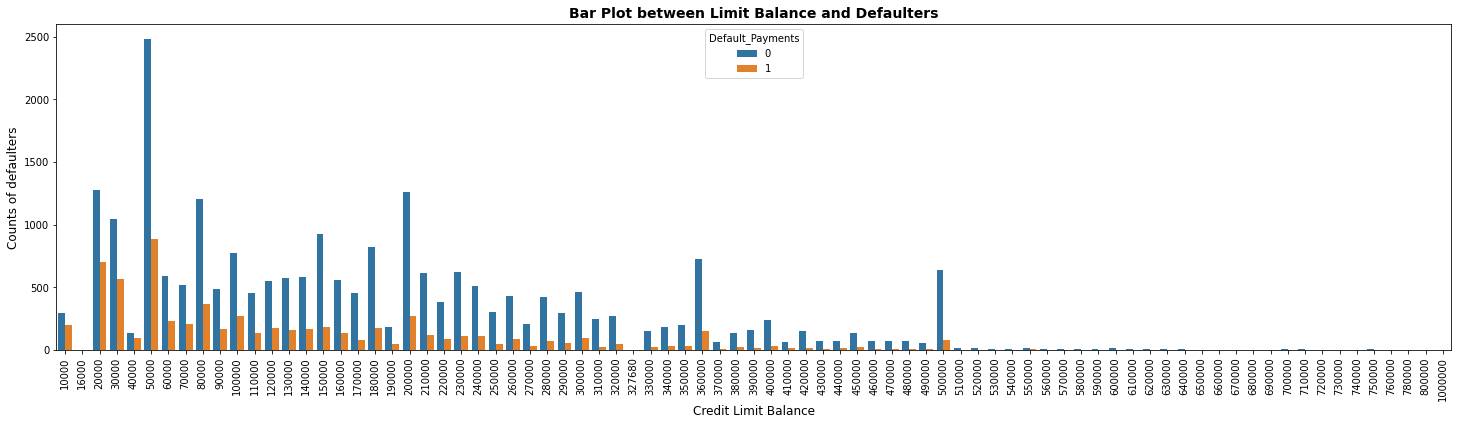

In [49]:
# Limit Balance 
plt.figure(figsize = (25,6))
sns.countplot(x = 'LIMIT_BAL',hue = 'Default_Payments',data = df)
plt.xticks(rotation = 90)
plt.title('Bar Plot between Limit Balance and Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('Credit Limit Balance',fontsize = 12)
plt.ylabel('Counts of defaulters',fontsize = 12)

* Majority of the defaulters are those who have credit limit balance between 20,000 to 3,00,000
* After the credit limit 5,00,000, number of defaulters are almost negligible.

## **Lets Visualize the rest features of bill payments and amount of previous payments of different months**

### **Defaulter According to Bill Payments**

In [50]:
# Having just overview of mean of bill payments of defaulters
bill_amt = ['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JULY','BILL_AMT_JUNE','BILL_AMT_MAY','BILL_AMT_APRIL']
df.groupby('Default_Payments')[bill_amt].mean()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL
Default_Payments,,,,,,
0,51994.227273,49717.435670,47533.365605,43611.165254,40530.445343,39042.268704
1,48509.162297,47283.617842,45181.598855,42036.950573,39540.190476,38271.435503


* Defaulters do not have average bill payment amount not more than 49,000(NT Dollar)
* The most concerned area about the defaulters are around the average bill amount. 


### **Defaulter According to Payment Amount**

---

In [51]:
#Let's have a look at mean of  previous payment of different months 
pay_amt = ['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL']
df.groupby("Default_Payments")[pay_amt].mean()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL
Default_Payments,,,,,,
0,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


* Defaulters do not have average previous bill payment amount not more than 3500(NT Dollar)
* The most concerned area about the defaulters are around the average previous bill payment amount.


### **Checking Correlation Between Columns**


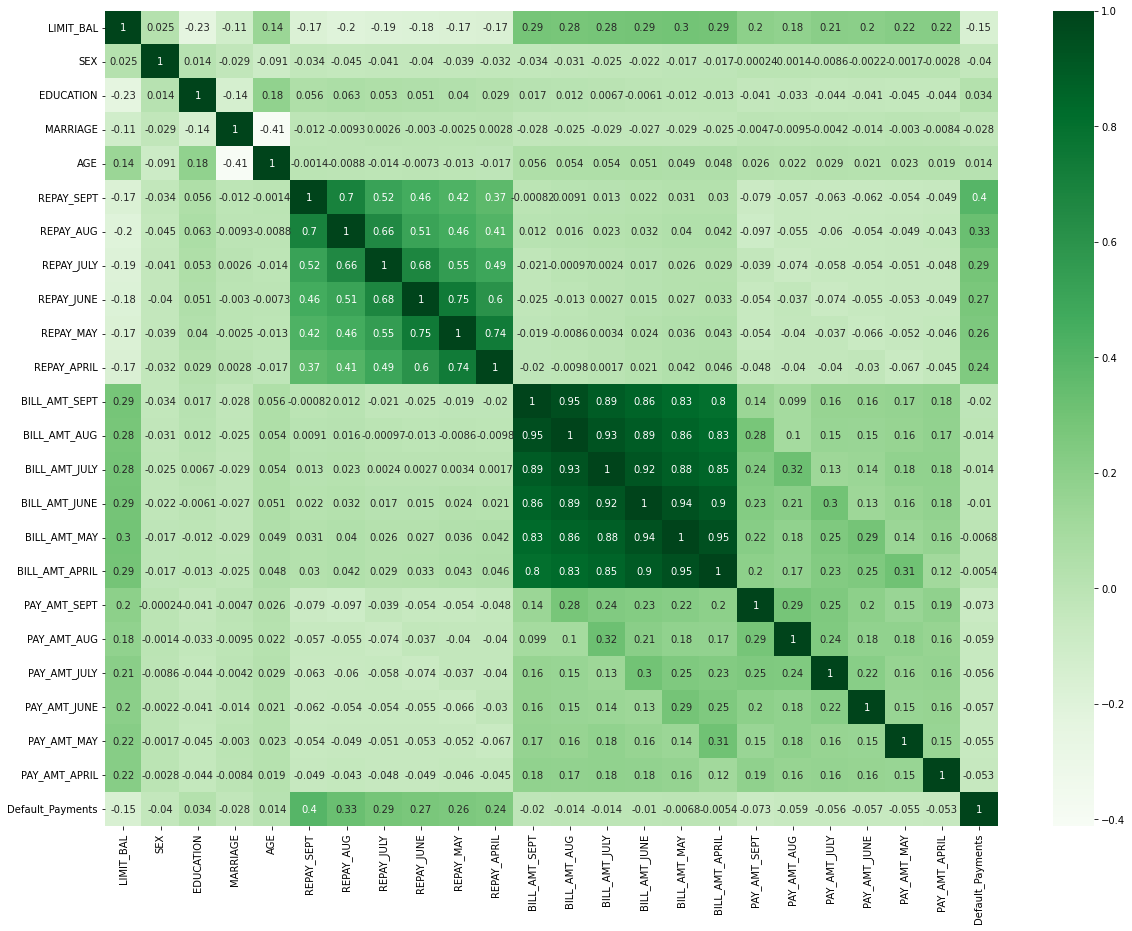

In [52]:
#Checking correlation between columns
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="Greens")

Here many features are correlated with each other, but we cant delete those features. But we can do some feature engineering of average bill amount of six months. lets do it and check multicollinearity 

In [53]:
# #Create a new feature of 6 month of average bill amount
# df['Avg_bill_amount']=(df['BILL_AMT_SEPT']+df['BILL_AMT_AUG']+df['BILL_AMT_JULY']
#                        +df['BILL_AMT_JUNE']+df['BILL_AMT_MAY']+df['BILL_AMT_APRIL'])/6

In [54]:
# #Drop Those 6 month of bill amount columns
# df.drop(columns=['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JULY','BILL_AMT_JUNE','BILL_AMT_MAY','BILL_AMT_APRIL'],inplace=True)


### **Checking Multicollinearity**


In [55]:
# #Multicollinearity
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# def calc_vif(X):
 
#    # Calculating VIF
#    vif = pd.DataFrame()
#    vif["variables"] = X.columns
#    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
#    return(vif)

In [56]:
# #Check Multicollinearity of Numerical Columns
# calc_vif(df[[i for i in df.describe().columns if i not in ['Default_Payments']]])

## 5. Hypothesis Testing
---

#### 5.1 Correlation between credit limit and payment default.
* Ideally, we should have customers' income data, but since this data is not available, we can assume higher income customers have higher credit limits. Therefore, we will verify if there is a correlation between credit limit and default payment using t-test.

* Null hypothesis: credit limit does not affect default likelihood.
* Alternative hypothesis: credit limit impact default likelihood.
* Set significance level  to 0.05

In [57]:
no_def_limit = df.loc[df['Default_Payments']==0,'LIMIT_BAL']
def_limit = df.loc[df['Default_Payments']==1,'LIMIT_BAL']

In [58]:
from scipy import stats
from scipy.stats import ttest_ind_from_stats

ttest_ind_from_stats(mean1=np.mean(no_def_limit),std1=np.std(no_def_limit),nobs1=len(no_def_limit),
                     mean2=np.mean(def_limit),std2=np.std(def_limit),nobs2=len(def_limit))

Ttest_indResult(statistic=26.90935759020854, pvalue=1.2739158026091975e-157)

We get a p value as 0, therefore we need to reject the null hypothesis and accept the alternative hypothesis. Credit limit has an impact on payment default.

#### 5.2 Correlation between education and payment default.
* Previous visualization indicates education impacts default likelihood. We will use a Chi-squared test to verify this finding.

* Null hypothesis: education does not affect default likelihood.
* Alternative hypothesis: education impacts default likelihood.
* Set significance level  to 0.05

In [59]:
# Get the contigence table of education and default data

edu_def_contigence = pd.crosstab(df['Default_Payments'], df['EDUCATION'], margins=False)

In [60]:
# Use Chi-squared test to test if education affects default likelihood.

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(edu_def_contigence)

p

1.495064564810615e-34

Since the p value is close to 0, we will reject the null hypothesis and accept the alternative hypothesis. Because education has a strong correlation with default probability, we should keep this variable in the machine learning model.

#### 5.3 Correlation between age and payment default.
* Previous visualization indicates age impacts default likelihood. We will use a chi-squared test to verify this finding.

* Null hypothesis: age does not affect default likelihood.
* Alternative hypothesis: age impacts default likelihood.
* Set significance level  to 0.05

In [61]:
# Get the contigence table of age and default data

age_def_contigence = pd.crosstab(df['Default_Payments'], df['AGE'], margins=False)

In [62]:
# Use chi-squared test to test if age affects default likelihood.

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(age_def_contigence)

p

5.6429915495725416e-12

The p value is smaller than significance level , we will reject the null hypothesis and accept the alternative hypothesis, which is age has impact on default probability.

## 6. Feature Engineering & Data Pre-processing
---

### 6.1 One Hot Encoding

In [63]:
# Independent features making a copy of dataset 
cred_dup_df = df.copy().drop(columns='Default_Payments')
cred_dup_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JULY,REPAY_JUNE,REPAY_MAY,...,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL
0,20000,2,2,1,24,2,2,0,0,0,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,0,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,0,0,0,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,0,0,0,0,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,0,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,0,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [64]:
# Transform features Marriage, Age and Education using one-hot-encoding
cred_dup_df = pd.get_dummies(cred_dup_df,columns = ['EDUCATION','SEX','MARRIAGE'])


In [65]:
# renaming columns to get better understanding about dummy variables
cred_dup_df.rename(columns = {'EDUCATION_1':'EDUCATION_GRADUATE','EDUCATION_2':'EDUCATION_UNIVERSITY','EDUCATION_3':'EDUCATION_HIGH_SCHOOL','EDUCATION_4':'EDUCATION_OTHERS',
                              'SEX_1':'MALE','SEX_2':'FEMALE','MARRIAGE_1':'SINGLE','MARRIAGE_2':'MARRIED','MARRIAGE_3':'MARRIAGE_OTHERS'},inplace = True)
cred_dup_df.head(3)

,LIMIT_BAL,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JULY,REPAY_JUNE,REPAY_MAY,REPAY_APRIL,BILL_AMT_SEPT,BILL_AMT_AUG,...,PAY_AMT_APRIL,EDUCATION_GRADUATE,EDUCATION_UNIVERSITY,EDUCATION_HIGH_SCHOOL,EDUCATION_OTHERS,MALE,FEMALE,SINGLE,MARRIED,MARRIAGE_OTHERS
0,20000,24,2,2,0,0,0,0,3913,3102,...,0,0,1,0,0,0,1,1,0,0
1,120000,26,0,2,0,0,0,2,2682,1725,...,2000,0,1,0,0,0,1,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,5000,0,1,0,0,0,1,0,1,0


In [66]:
#Final all columns
cred_dup_df.columns

Index(['LIMIT_BAL', 'AGE', 'REPAY_SEPT', 'REPAY_AUG', 'REPAY_JULY',
       'REPAY_JUNE', 'REPAY_MAY', 'REPAY_APRIL', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUNE', 'BILL_AMT_MAY',
       'BILL_AMT_APRIL', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JULY',
       'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL', 'EDUCATION_GRADUATE',
       'EDUCATION_UNIVERSITY', 'EDUCATION_HIGH_SCHOOL', 'EDUCATION_OTHERS',
       'MALE', 'FEMALE', 'SINGLE', 'MARRIED', 'MARRIAGE_OTHERS'],
      dtype='object')

In [67]:
# independent variable and dependent variable
X=cred_dup_df
y=df['Default_Payments']

### **6.2 Scaling independent variables**

In [68]:
#Scaling independent variables data
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

### **6.3 Splitting *X* and *y* into Training and Testing Dataset**

In [69]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 0,stratify=y)

In [70]:
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (22500, 29)
Shape of y_train: (22500,)
Shape of X_test: (7500, 29)
Shape of y_test: (7500,)


### 6.4 Handelling Imbalance Dataset with SMOTE

In [71]:
# importing SMOTE 
from imblearn.over_sampling import SMOTE

print('Dataset Before:\n', y_train.value_counts())
smt = SMOTE()

# fit predictor and target variable
X_train_smt, y_train_smt = smt.fit_resample(X_train,y_train)

print('\nDataset After:\n',y_train_smt.value_counts())

Dataset Before:
 0    17523
1     4977
Name: Default_Payments, dtype: int64

Dataset After:
 0    17523
1    17523
Name: Default_Payments, dtype: int64


## ***7. ML Model Implementation***



### 7.1 Without Hyperparameter Tuning

In [72]:
#import required ML models library:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Creating dict of clasification model without hyper parameter
models = {
    LogisticRegression(): "    Logistic Regression",
    SVC():                 "Support Vector Machine",
    KNeighborsClassifier():                   'KNN',
    RandomForestClassifier():        'RandomForest',
    XGBClassifier():                'XGBClassifier'
}
# fitting all model using loop 
for model in models.keys():
    model.fit(X_train_smt, y_train_smt)

In [73]:
#create a function to calculate evaluation matrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
eval_score=[]
def get_score(model,y_true, y_pred):
    score={} #creating empty dict for storing model and score of the model
    score['Model']=model
    score['accuracy']= round(accuracy_score(y_true,y_pred)*100,2)
    score['precision'] = round(precision_score(y_true,y_pred)*100,2)
    score['recall'] = round(recall_score(y_true,y_pred)*100,2)
    score['f1_score_'] = round(f1_score(y_true,y_pred)*100,2)
    score['roc_auc_score'] = round(roc_auc_score(y_true,y_pred)*100,2)
    eval_score.append(score) #appending dict into list (list of dict)
def result():
    return pd.DataFrame(eval_score) #creating list of dict into pandas dataframe

def get_cm(y_true, y_pred):
  # Get the confusion matrix for both train and test
  cm = confusion_matrix(y_true, y_pred)
  print(cm)

  labels = ['Not Defaulter', 'Defaulter']
  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
    
  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

In [74]:
#predicting train and test data and get model score:
print('ML Model Implementation without Hyperparameter Tuning')
for model, name in models.items():
    y_pred_lr_train = model.predict(X_train_smt)
    y_pred_lr_test = model.predict(X_test)
    get_score(str(name)+'_train',y_train_smt, y_pred_lr_train)
    get_score(str(name)+'_test',y_test, y_pred_lr_test)
result()  # calling function for get score of all metrices

ML Model Implementation without Hyperparameter Tuning


,Model,accuracy,precision,recall,f1_score_,roc_auc_score
0,Logistic Regression_train,70.22,77.66,56.75,65.58,70.22
1,Logistic Regression_test,77.64,49.51,55.03,52.13,69.55
2,Support Vector Machine_train,72.45,77.93,62.63,69.45,72.45
3,Support Vector Machine_test,76.29,47.01,56.48,51.31,69.20
4,KNN_train,86.23,80.24,96.14,87.47,86.23
5,KNN_test,65.25,34.02,60.76,43.62,63.64
6,RandomForest_train,99.96,99.97,99.96,99.96,99.96
7,RandomForest_test,78.48,51.46,47.68,49.50,67.45
8,XGBClassifier_train,79.52,84.39,72.42,77.95,79.52
9,XGBClassifier_test,78.20,50.71,51.36,51.03,68.59


    Logistic Regression train Confusion matrix:
[[14663  2860]
 [ 7578  9945]]
    Logistic Regression test Confusion matrix:
[[4910  931]
 [ 746  913]]

 ----------------------------------------------------
Support Vector Machine train Confusion matrix:
[[14416  3107]
 [ 6549 10974]]
Support Vector Machine test Confusion matrix:
[[4785 1056]
 [ 722  937]]

 ----------------------------------------------------
KNN train Confusion matrix:
[[13374  4149]
 [  676 16847]]
KNN test Confusion matrix:
[[3886 1955]
 [ 651 1008]]

 ----------------------------------------------------
RandomForest train Confusion matrix:
[[17517     6]
 [    7 17516]]
RandomForest test Confusion matrix:
[[5095  746]
 [ 868  791]]

 ----------------------------------------------------
XGBClassifier train Confusion matrix:
[[15176  2347]
 [ 4832 12691]]
XGBClassifier test Confusion matrix:
[[5013  828]
 [ 807  852]]

 ----------------------------------------------------


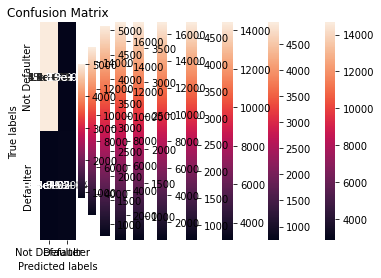

In [75]:
#predicting train and test data and get model score:
for model, name in models.items():
    y_pred_lr_train = model.predict(X_train_smt)
    y_pred_lr_test = model.predict(X_test)
    print(name + ' train Confusion matrix:')
    get_cm(y_train_smt,y_pred_lr_train)
    print(name + ' test Confusion matrix:')
    get_cm(y_test,y_pred_lr_test)
    print('\n ----------------------------------------------------')

### 7.2 Cross- Validation & Hyperparameter Tuning

# Logistic Regression

In [76]:
#fitting the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression()
param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10] }   #set the parmeter

logistic_grid_model = GridSearchCV(logistic_regression, param_grid, scoring = 'precision',n_jobs = -1, verbose = 3, cv = 3)
logistic_grid_model.fit(X_train_smt,y_train_smt)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='precision', verbose=3)

In [77]:
# Best parameters 
logistic_grid_model.best_params_   

{'C': 0.0001, 'penalty': 'l2'}

In [78]:
logistic_grid_model.best_score_

0.7878098833911089

In [79]:
#prediction
y_pred_lr_train = logistic_grid_model.predict(X_train_smt)
y_pred_lr_test = logistic_grid_model.predict(X_test)

In [80]:
#evaluation matrix on train data:
get_score('Logistic_train',y_train_smt, y_pred_lr_train)
get_score('Logistic_test',y_test, y_pred_lr_test)
result()

,Model,accuracy,precision,recall,f1_score_,roc_auc_score
0,Logistic Regression_train,70.22,77.66,56.75,65.58,70.22
1,Logistic Regression_test,77.64,49.51,55.03,52.13,69.55
2,Support Vector Machine_train,72.45,77.93,62.63,69.45,72.45
3,Support Vector Machine_test,76.29,47.01,56.48,51.31,69.20
4,KNN_train,86.23,80.24,96.14,87.47,86.23
5,KNN_test,65.25,34.02,60.76,43.62,63.64
6,RandomForest_train,99.96,99.97,99.96,99.96,99.96
7,RandomForest_test,78.48,51.46,47.68,49.50,67.45
8,XGBClassifier_train,79.52,84.39,72.42,77.95,79.52
9,XGBClassifier_test,78.20,50.71,51.36,51.03,68.59


[[4993  848]
 [ 773  886]]


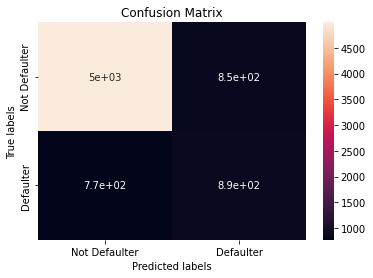

In [81]:
#confusion matrix for test data:
get_cm(y_test, y_pred_lr_test)

# K - Nearest Neibour (KNN)

In [82]:
#fit the parameter
param_grid = {'n_neighbors' : [2,3,4,5,6,7]}
knn = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs = -1, verbose = 3, cv = 4)
#training model
knn.fit(X_train_smt, y_train_smt)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7]}, verbose=3)

In [83]:
#best parameter of gridsearchcv
knn.best_params_

{'n_neighbors': 2}

In [84]:
#prediction
y_pred_knn_train = knn.predict(X_train_smt)
y_pred_knn_test = knn.predict(X_test)

In [85]:
#evaluation matrix on train data
get_score('knn_train',y_train_smt, y_pred_knn_train)
get_score('knn_test',y_test, y_pred_knn_test)
result()

,Model,accuracy,precision,recall,f1_score_,roc_auc_score
0,Logistic Regression_train,70.22,77.66,56.75,65.58,70.22
1,Logistic Regression_test,77.64,49.51,55.03,52.13,69.55
2,Support Vector Machine_train,72.45,77.93,62.63,69.45,72.45
3,Support Vector Machine_test,76.29,47.01,56.48,51.31,69.20
4,KNN_train,86.23,80.24,96.14,87.47,86.23
5,KNN_test,65.25,34.02,60.76,43.62,63.64
6,RandomForest_train,99.96,99.97,99.96,99.96,99.96
7,RandomForest_test,78.48,51.46,47.68,49.50,67.45
8,XGBClassifier_train,79.52,84.39,72.42,77.95,79.52
9,XGBClassifier_test,78.20,50.71,51.36,51.03,68.59


[[4807 1034]
 [1053  606]]


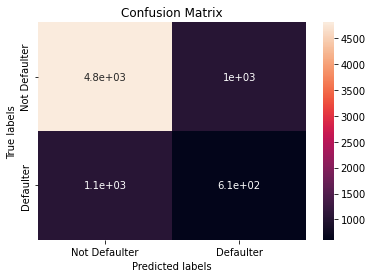

In [86]:
#confusion matrix
get_cm(y_test, y_pred_knn_test)

# Random Forest

In [87]:
estimator = RandomForestClassifier()
param_grid = {'n_estimators' : [50,80,100],'max_depth' : [3,5,6,7,8]}

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=4)

In [88]:
# Fit grid search to the data
grid.fit(X_train_smt, y_train_smt)
grid.best_params_

{'max_depth': 8, 'n_estimators': 80}

In [89]:
#prediction
y_pred_rf_train = grid.predict(X_train_smt)
y_pred_rf_test = grid.predict(X_test)

In [90]:
#evaluation matrix on train data and test data
get_score('Random Forest_train',y_train_smt, y_pred_rf_train)
get_score('Random Forest_test',y_test, y_pred_rf_test)
result()

,Model,accuracy,precision,recall,f1_score_,roc_auc_score
0,Logistic Regression_train,70.22,77.66,56.75,65.58,70.22
1,Logistic Regression_test,77.64,49.51,55.03,52.13,69.55
2,Support Vector Machine_train,72.45,77.93,62.63,69.45,72.45
3,Support Vector Machine_test,76.29,47.01,56.48,51.31,69.20
4,KNN_train,86.23,80.24,96.14,87.47,86.23
5,KNN_test,65.25,34.02,60.76,43.62,63.64
6,RandomForest_train,99.96,99.97,99.96,99.96,99.96
7,RandomForest_test,78.48,51.46,47.68,49.50,67.45
8,XGBClassifier_train,79.52,84.39,72.42,77.95,79.52
9,XGBClassifier_test,78.20,50.71,51.36,51.03,68.59


[[4755 1086]
 [ 704  955]]


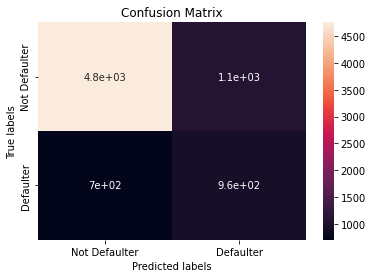

In [91]:
#confusion matrix
get_cm(y_test, y_pred_rf_test)

## XG Boosting

---

In [92]:
# import xgboost
from xgboost import XGBClassifier

In [93]:
# Fitting XGboost
xgb = XGBClassifier(class_weight = 'balanced',parameters = {'max_depth':7,'eta':1,'silent':1,'eval_metric':'auc'},random_state = 42)
xgb.fit(X_train_smt,y_train_smt)

XGBClassifier(class_weight='balanced',
              parameters={'eta': 1, 'eval_metric': 'auc', 'max_depth': 7,
                          'silent': 1},
              random_state=42)

In [94]:
# train and test prediction
y_pred_xgb_train = xgb.predict(X_train_smt)
y_pred_xgb_test = xgb.predict(X_test)

In [95]:
#evaluation matrix on train data
get_score('XG Boosting Train',y_train_smt, y_pred_xgb_train)
get_score('XG Boosting Test',y_test, y_pred_xgb_test)
result()

,Model,accuracy,precision,recall,f1_score_,roc_auc_score
0,Logistic Regression_train,70.22,77.66,56.75,65.58,70.22
1,Logistic Regression_test,77.64,49.51,55.03,52.13,69.55
2,Support Vector Machine_train,72.45,77.93,62.63,69.45,72.45
3,Support Vector Machine_test,76.29,47.01,56.48,51.31,69.20
4,KNN_train,86.23,80.24,96.14,87.47,86.23
5,KNN_test,65.25,34.02,60.76,43.62,63.64
6,RandomForest_train,99.96,99.97,99.96,99.96,99.96
7,RandomForest_test,78.48,51.46,47.68,49.50,67.45
8,XGBClassifier_train,79.52,84.39,72.42,77.95,79.52
9,XGBClassifier_test,78.20,50.71,51.36,51.03,68.59


[[5013  828]
 [ 807  852]]


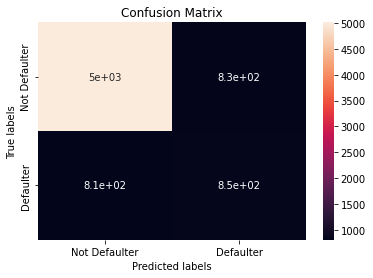

In [96]:
#confusion matrix
get_cm(y_test, y_pred_xgb_test)

# Model validation

# LIME

In [97]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 34.5 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=afa8f78f7bd8f7a83703aa5fc4de992b5f12449ee85d62fd40002b3c66f7bfe1
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [98]:
# LIME SECTION
import lime
import lime.lime_tabular

In [99]:
# LIME has one explainer for all the models
lime_svc = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  verbose=True, mode='classification')


In [102]:
# Choose the 5th instance and use it to predict the results
p = 5
exp_svc = lime_svc.explain_instance(X_test.values[p], xgb.predict_proba, num_features=6)
exp_svc.show_in_notebook(show_all=False)

ValueError: ignored

# Feature importance

In [103]:

features = X_train.columns
importances = xgb.feature_importances_
indices = np.argsort(importances[:10])

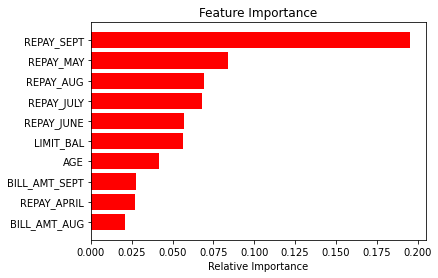

In [104]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# ELI5

In [105]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 21.8 MB/s 
     |████████████████████████████████| 133 kB 53.8 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=099617d63db57d154c3051e4bcc7906fd9e8e988ced311a4f798e73f4a1a22d9
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incomp

In [106]:
import eli5
from eli5.lime import TextExplainer

te = TextExplainer(random_state=42)
te.fit(doc, pipe.predict_proba)
te.show_prediction(target_names=twenty_train.target_names)

NameError: ignored

In [ ]:
#import eli5
import eli5 as eli
feature_names=list(X_test.columns)

In [ ]:
for_instance=2

In [ ]:
 eli.show_prediction(gb_clf.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

## From above charts we can say that lmit baance and the last months transactions are the important features for prediction the defaulter